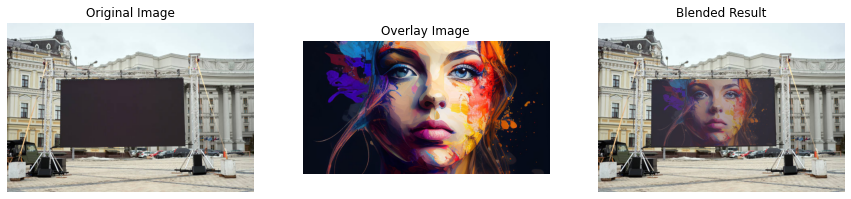

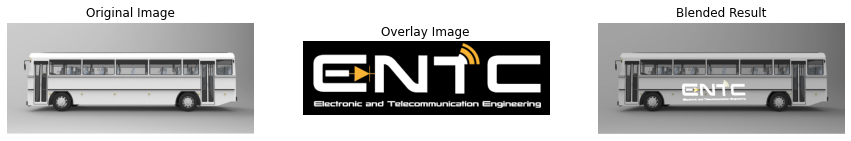

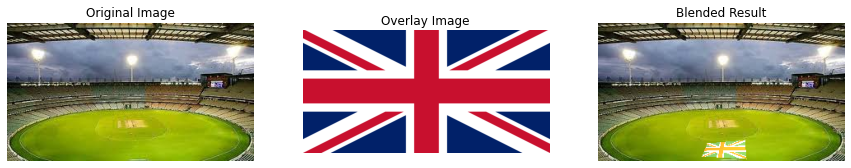

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# List of images to process
images = [cv.imread('big screen.jpg'), cv.imread('leyland.jpeg'), cv.imread('cricket.jpeg')]

# Coefficients for blending images
blending_coeffs = [(1, 0.5, 0.2), (0.8, 1, 0), (1, 1, 0)]

# List of source images to overlay
source_images = [cv.imread('girl.jpg'), cv.imread('entclogo.png'), cv.imread('flag.png')]

# Iterate over the images
for i in range(len(images)):
    # Current image and overlay image
    background_img = images[i]
    overlay_img = source_images[i]
    
    # List to store user-clicked points
    points = []
    
    # Function to capture mouse clicks
    def get_clicks(event, x, y, flags, param):
        if event == cv.EVENT_LBUTTONDOWN:
            points.append([x, y])
    
    # Display the current image and set up the mouse callback
    cv.imshow('Image Display', background_img)
    cv.setMouseCallback('Image Display', get_clicks)
    cv.waitKey(0)
    cv.destroyAllWindows()

    # If the overlay image is not available, move to the next one
    if overlay_img is None:
        print(f"Error: Could not load source image '{source_images[i]}'")
        continue
    
    # Set up source points (corners of the overlay image)
    height, width = overlay_img.shape[:2]
    src_points = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])
    
    # Use the clicked points as destination points for homography
    dst_points = np.array(points)
    
    # Find homography and apply perspective transformation
    homography_matrix, status = cv.findHomography(src_points, dst_points)
    warped_img = cv.warpPerspective(overlay_img, homography_matrix, (background_img.shape[1], background_img.shape[0]))
    
    # Blend the warped image with the background image
    blended_result = cv.addWeighted(background_img, blending_coeffs[i][0], warped_img, blending_coeffs[i][1], blending_coeffs[i][2])
    
    # Show the blended image
    cv.imshow("Blended Result", blended_result)
    cv.waitKey(0)
    cv.destroyAllWindows()

    # Display the images side by side using Matplotlib
    fig, axes = plt.subplots(1, 3, figsize=(15, 10), facecolor="white")
    titles = ['Original Image', 'Overlay Image', 'Blended Result']
    
    # Convert the images to RGB for proper display with Matplotlib
    images_to_show = [background_img, overlay_img, blended_result]
    for j in range(3):
        rgb_img = cv.cvtColor(images_to_show[j], cv.COLOR_BGR2RGB)
        axes[j].axis('off')
        axes[j].imshow(rgb_img)
        axes[j].set_title(titles[j])
    
# Show the result plots
plt.show()
